In [1]:
from imtools import *
from scipy.signal import convolve2d

In [2]:
def noise (u, sigma):
    return u + np.random.normal(0, sigma, size=u.shape)

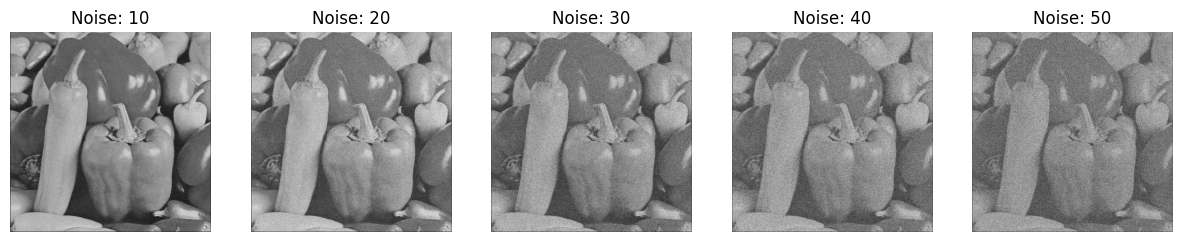

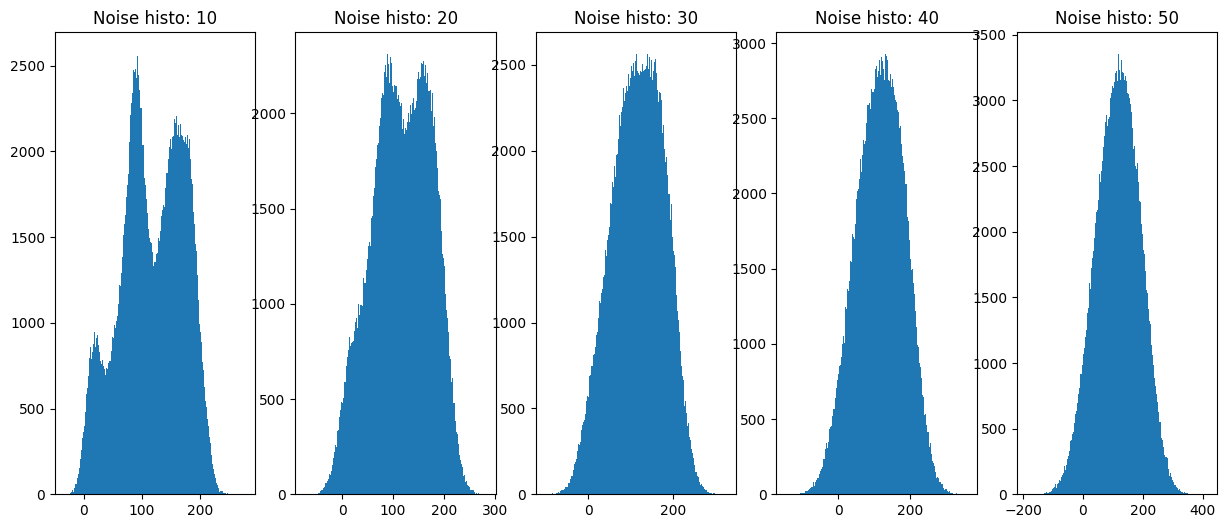

In [16]:
noises = [10, 20, 30, 40, 50]
# Plot the noisy images and their histograms
u = open_image('images/peppers.png')
image_noises = [noise(u, sigma) for sigma in noises]

plt.figure(figsize=(15, 15))
for i in range(len(image_noises)):
    plt.subplot(1, len(image_noises), i + 1)
    plt.imshow(image_noises[i], cmap='gray')
    plt.title('Noise: ' + str(noises[i]))
    plt.axis('off')
plt.show()

plt.figure(figsize=(15, 6))
for i in range(len(image_noises)):
    plt.subplot(1, len(image_noises), i + 1)
    plt.hist(image_noises[i].flatten(), bins=256)
    plt.title('Noise histo: ' + str(noises[i]))
plt.show()

In [28]:
# Flou en boite
def flou(u):
    """
        Filtre 1/9(Dirac(0,0) + Dirac(1,0) + Dirac(0,1) + Dirac(-1,0) + Dirac(0,-1) + Dirac(1,1) + Dirac(-1,1) + Dirac(1,-1) + Dirac(-1,-1))
    """
    return (u + shift_image(u, 1, 0) + shift_image(u, 0, 1) + shift_image(u, -1, 0) + shift_image(u, 0, -1) + shift_image(u, 1, 1) + shift_image(u, -1, 1) + shift_image(u, 1, -1) + shift_image(u, -1, -1)) / 9

In [33]:
# Filtre passe haut
def passeHaut(u):
    """ 
        Filtre 8*Dirac(0,0) - Dirac(1,0) - Dirac(0,1) - Dirac(-1,0) - Dirac(0,-1) - Dirac(1,1) - Dirac(-1,1) - Dirac(1,-1) - Dirac(-1,-1)
    """
    return -8 * u - shift_image(u, 1, 0) - shift_image(u, 0, 1) - shift_image(u, -1, 0) - shift_image(u, 0, -1) - shift_image(u, 1, 1) - shift_image(u, -1, 1) - shift_image(u, 1, -1) - shift_image(u, -1, -1)

In [75]:
def mse(h1, h2):
    return np.sum((h1 - h2) ** 2) / len(h1)

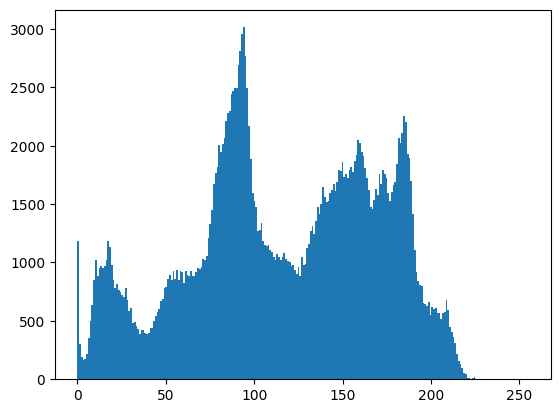

In [76]:
plt.hist(u.flatten(), bins=256)
plt.show()

The histo we are trying to get back.

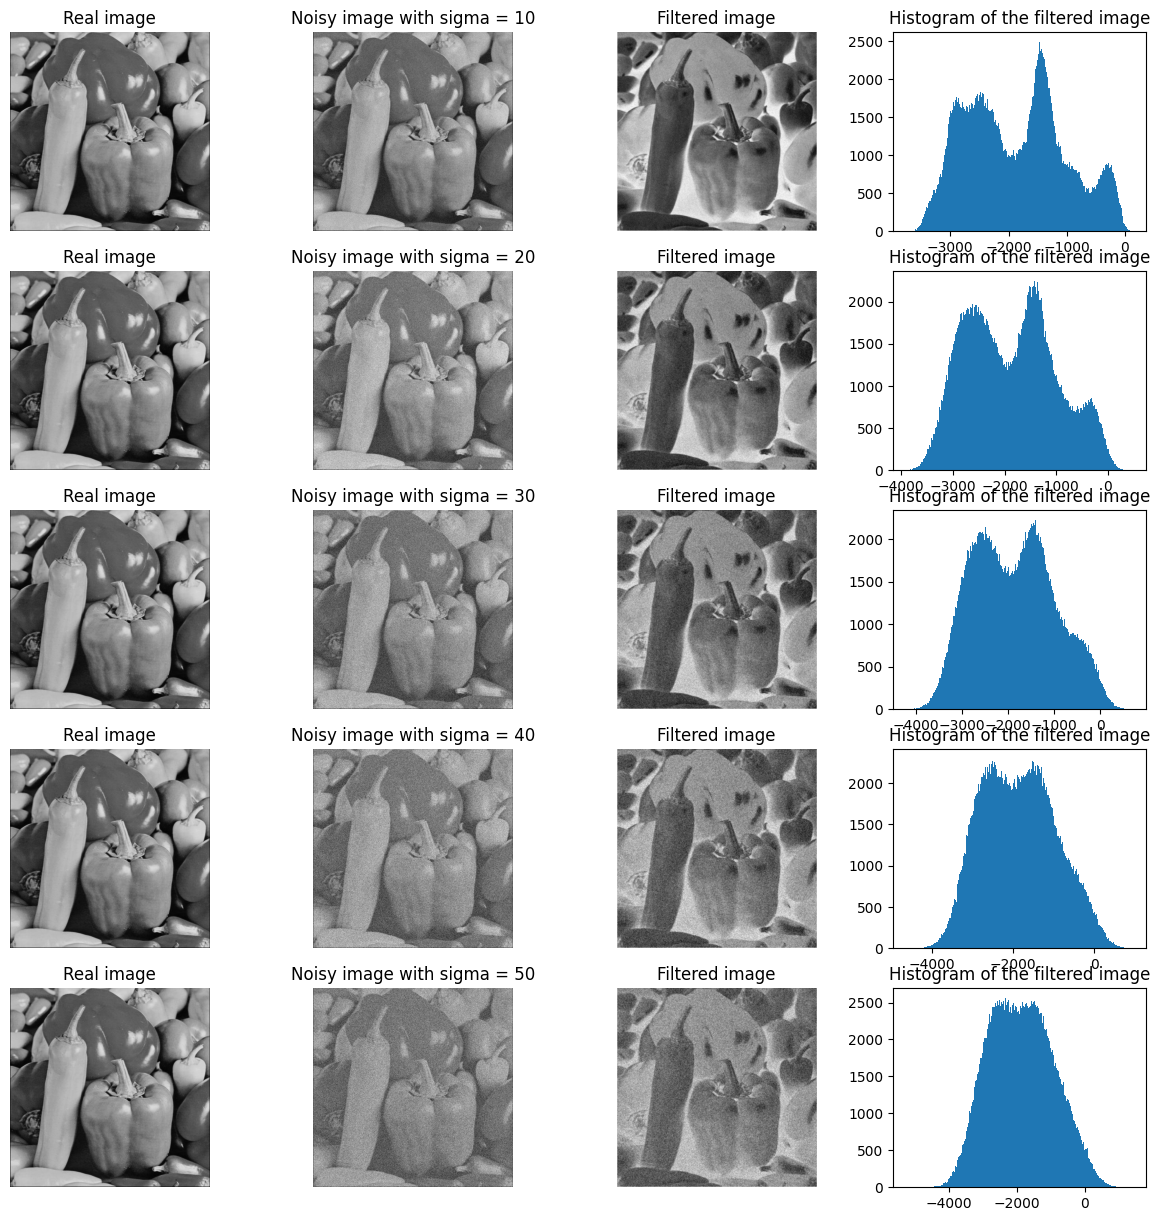

In [84]:
# Apply passeHaut to the noisy images
images = [passeHaut(u) for u in image_noises]

plt.figure(figsize=(15, 15))
for i in range(len(images)):
    # Show the real image and the noisy one and the filtered one and histogram
    plt.subplot(len(images), 4, i * 4 + 1)
    plt.imshow(u, cmap='gray')
    plt.title('Real image')
    plt.axis('off')
    plt.subplot(len(images), 4, i * 4 + 2)
    plt.imshow(image_noises[i], cmap='gray')
    plt.title('Noisy image with sigma = ' + str(noises[i]))
    plt.axis('off')
    plt.subplot(len(images), 4, i * 4 + 3)
    plt.imshow(images[i], cmap='gray')
    plt.title('Filtered image')
    plt.axis('off')
    plt.subplot(len(images), 4, i * 4 + 4)
    plt.hist(images[i].flatten(), bins=256)
    plt.title('Histogram of the filtered image')
    
plt.show()

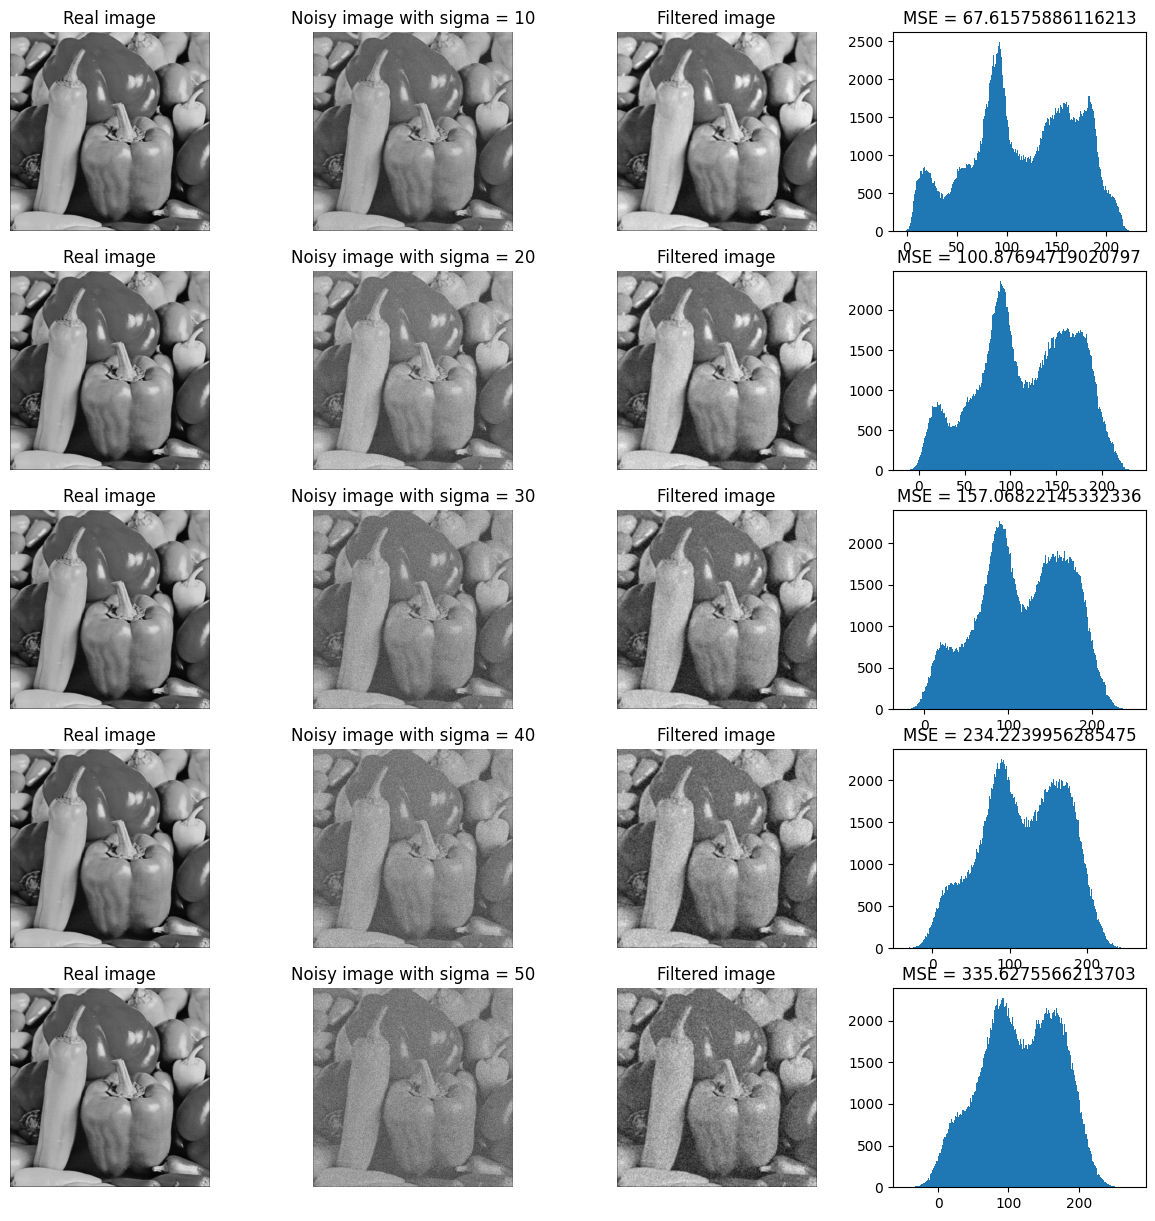

In [78]:
# Apply passeBas to the noisy images
images = [flou(u) for u in image_noises]

plt.figure(figsize=(15, 15))
for i in range(len(images)):
    # Show the real image and the noisy one and the filtered one and histogram
    plt.subplot(len(images), 4, i * 4 + 1)
    plt.imshow(u, cmap='gray')
    plt.title('Real image')
    plt.axis('off')
    plt.subplot(len(images), 4, i * 4 + 2)
    plt.imshow(image_noises[i], cmap='gray')
    plt.title('Noisy image with sigma = ' + str(noises[i]))
    plt.axis('off')
    plt.subplot(len(images), 4, i * 4 + 3)
    plt.imshow(images[i], cmap='gray')
    plt.title('Filtered image')
    plt.axis('off')
    plt.subplot(len(images), 4, i * 4 + 4)
    plt.hist(images[i].flatten(), bins=256)
    plt.title('MSE = ' + str(mse(images[i].flatten(), u.flatten())))
    
plt.show()

On va choisir le passe-bas car meilleur histogrames. Et on va agrandir els kernels des convolutions.

In [98]:
# Faire filtre passe bas avec kernel = 10x10
def passeBas(u):
    kernel = np.ones((10, 10)) / 100
    return convolve2d(u, kernel, mode='same', boundary='symm')

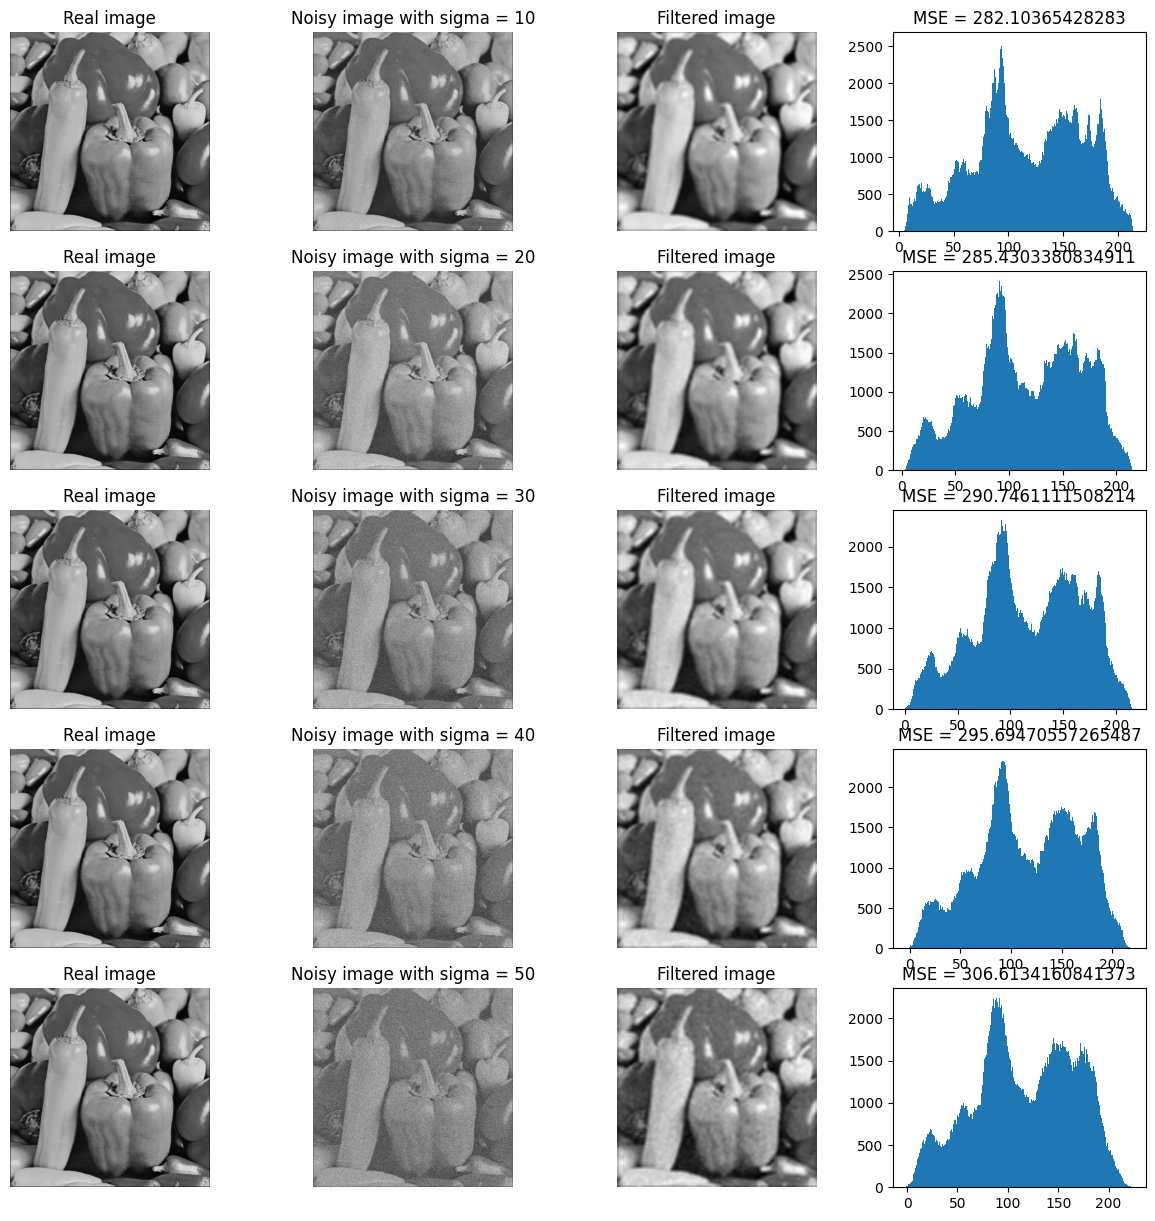

In [99]:
images = [passeBas(u) for u in image_noises]

plt.figure(figsize=(15, 15))
for i in range(len(images)):
    # Show the real image and the noisy one and the filtered one and histogram
    plt.subplot(len(images), 4, i * 4 + 1)
    plt.imshow(u, cmap='gray')
    plt.title('Real image')
    plt.axis('off')
    plt.subplot(len(images), 4, i * 4 + 2)
    plt.imshow(image_noises[i], cmap='gray')
    plt.title('Noisy image with sigma = ' + str(noises[i]))
    plt.axis('off')
    plt.subplot(len(images), 4, i * 4 + 3)
    plt.imshow(images[i], cmap='gray')
    plt.title('Filtered image')
    plt.axis('off')
    plt.subplot(len(images), 4, i * 4 + 4)
    plt.hist(images[i].flatten(), bins=256)
    # Title MSE difference between the hist of the filtered image and the real image
    plt.title('MSE = ' + str(mse(images[i].flatten(), u.flatten())))

plt.show()

Much closer to the real image.

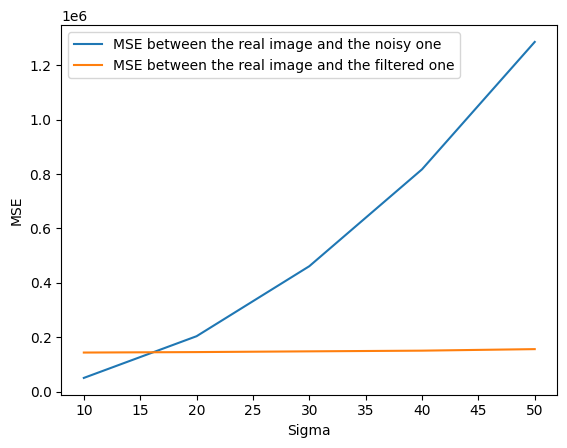

In [102]:
# Graph the MSE on the sigma
plt.plot(noises, [mse(u, image_noises[i]) for i in range(len(image_noises))], label='MSE between the real image and the noisy one')
plt.plot(noises, [mse(u, images[i]) for i in range(len(images))], label='MSE between the real image and the filtered one')
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.legend()
plt.show()